# Libraries

In [1]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
train_file_id = '1nPnVi-YOi1V3posfH6AmRh9FepxRDsHx'
train_output_file = 'Dataset2/Food Calories Estimation EDA.csv'

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1nPnVi-YOi1V3posfH6AmRh9FepxRDsHx
To: c:\Users\firma\Documents\Python\Bangkit\Food Calories Estimation\Dataset2\Food Calories Estimation EDA.csv
100%|██████████| 738k/738k [00:01<00:00, 520kB/s]


# EDA

## Histogram Plot

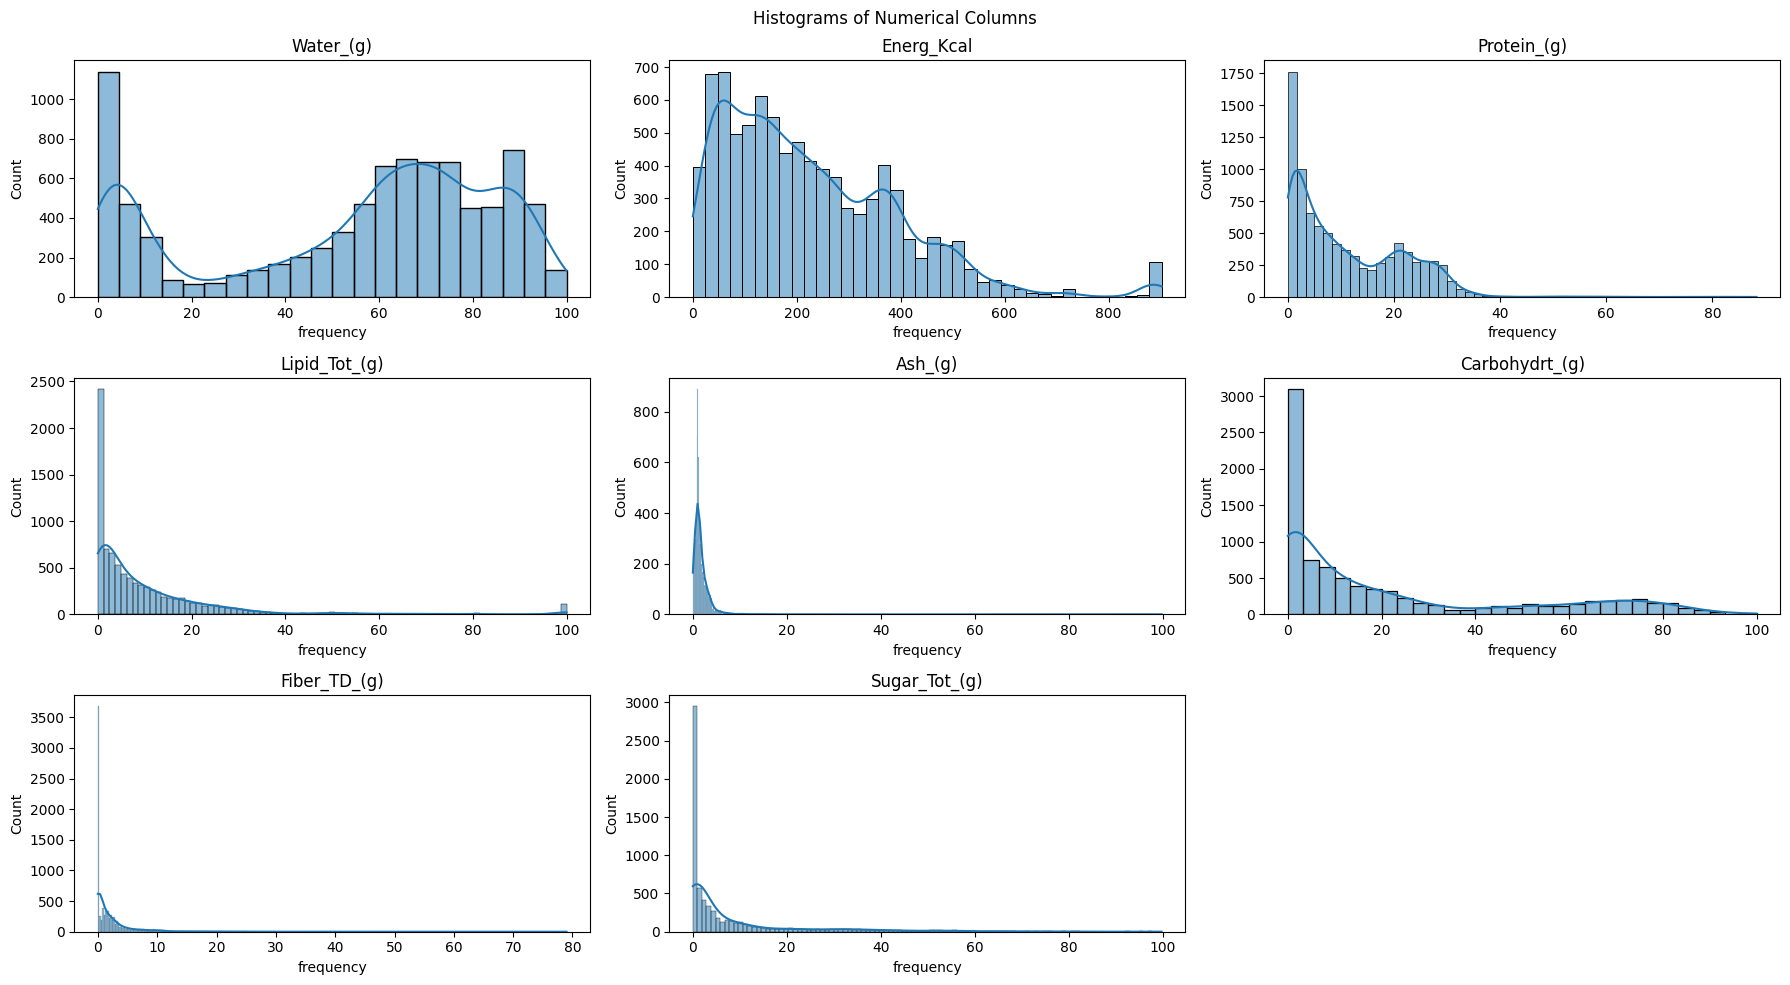

In [5]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = sns.histplot(x = df[col], ax = axes[i], kde = True)
    ax.set_title(col)
    ax.set_xlabel('frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()

## Boxplot

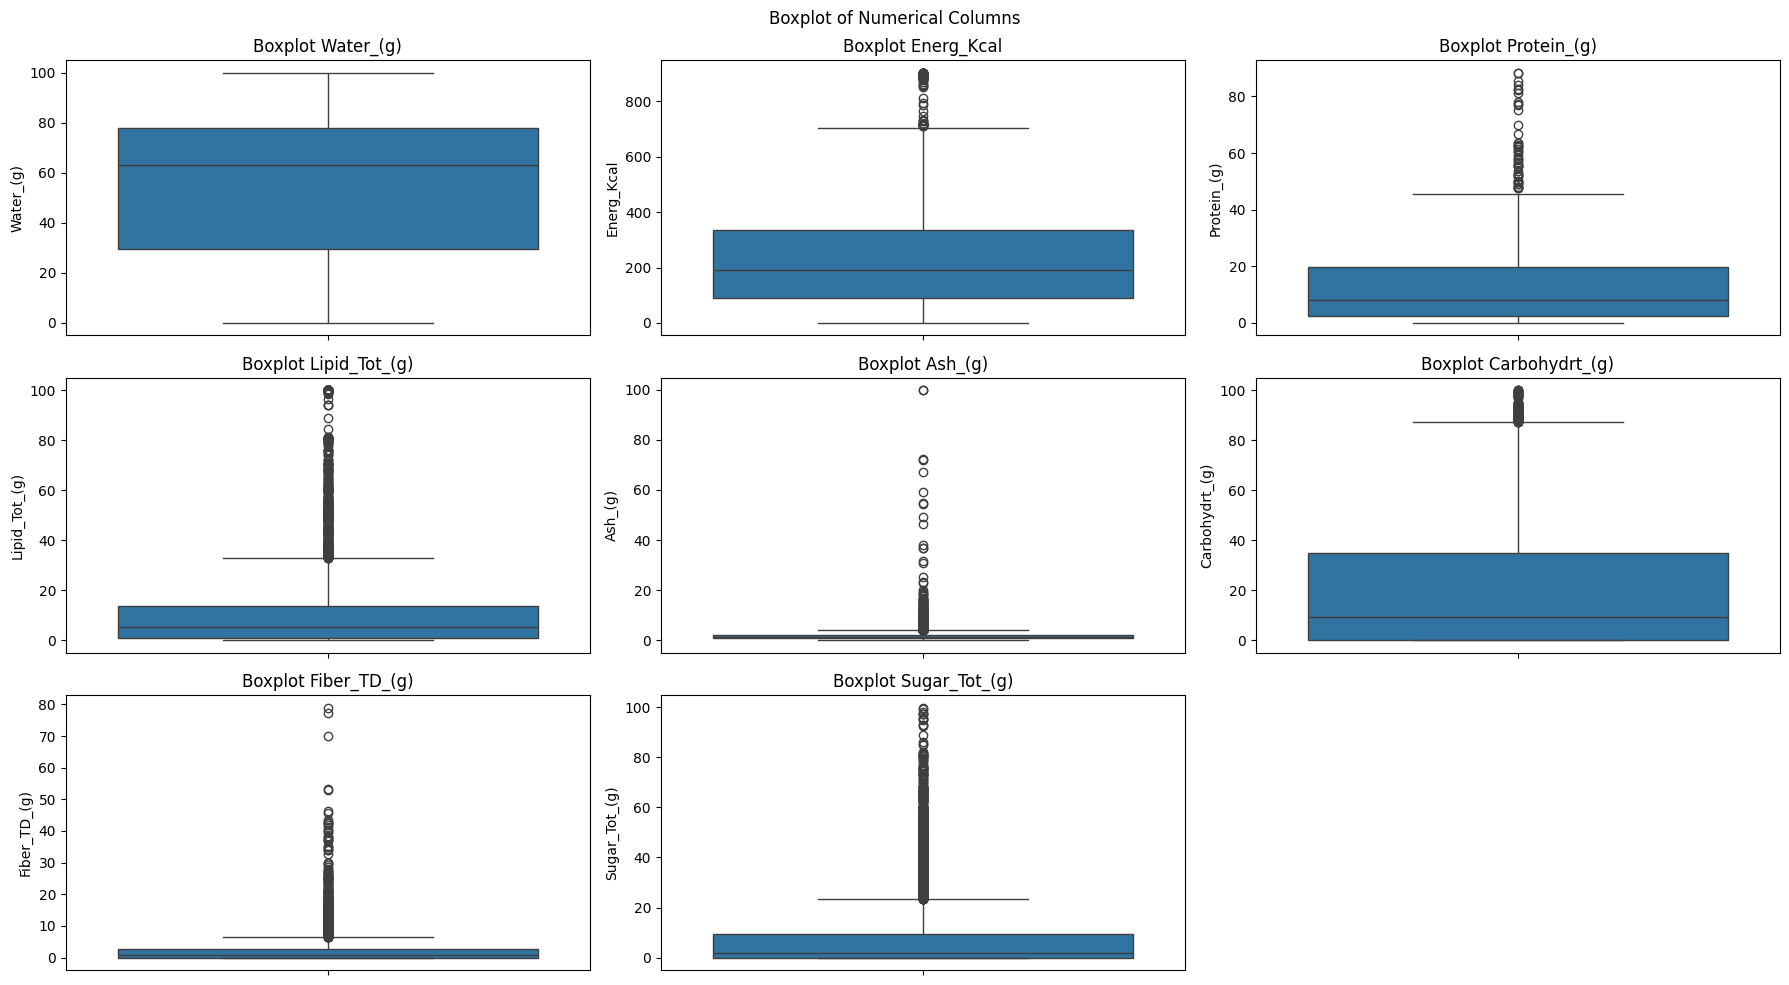

In [6]:
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, var in enumerate(columns):
    ax = sns.boxplot(y=df[var], ax=axes[i])
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel(var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot of Numerical Columns")
plt.tight_layout()
plt.show()

## Heatmap

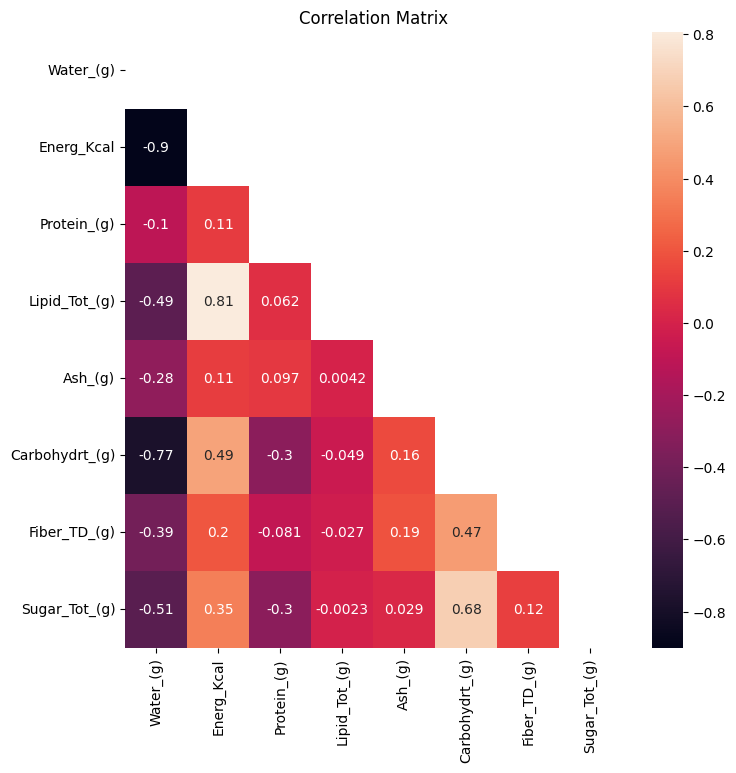

In [7]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]

corr = df[columns].corr()
plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()